# numpy save preliminary .npy
in this we will save relevant arrays needed for running the big simulation code

In [2]:
#Variables to play with, eventually will be deprecated:
bin_number = 30

In [3]:
#Import Statements & Define Constants
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from scipy.stats import lognorm
from scipy.stats import ks_2samp
import math
import rebound
import random
from numpy.random import seed, random
from scipy.stats import rayleigh
from scipy.stats import norm
import itertools
from spock import FeatureClassifier
from decimal import Decimal
import pandas as pd
from tqdm import tqdm
from matplotlib.ticker import EngFormatter
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

fmodel = FeatureClassifier()
earth_mass = 5.97219*10**24
sun_mass = 1.981 * 10**30
mass_ratio = earth_mass/sun_mass

/home/miniconda3/envs/kaichen/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/miniconda3/envs/kaichen/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIlEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  warn(f"Failed to load image Python extension: {e}")


[07:40:43] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:888: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.


# Load NASA Exoplanet Archive data needed
Use archive to find planets that have compact inner period ratios

In [7]:
# load data of planets that have inner period ratio 1.1-1.5
df = pd.read_csv("compact_planet_data.csv", index_col=0)
df.head()

,Planet Name,Host Name,Orbital Period,Discovery Method,Semi-Major Axis (AU),Eccentricity,Radius (R_earth),Mass or Mass * sin(i) (M_earth),Stellar Mass (M_sun)
119,DMPP-1 b,DMPP-1,18.570,Radial Velocity,0.1462,0.083,5.29,24.27,1.21
120,DMPP-1 c,DMPP-1,6.584,Radial Velocity,0.0733,0.057,3.06,9.60,1.21
122,DMPP-1 e,DMPP-1,5.516,Radial Velocity,0.0651,0.070,1.86,4.13,1.21
194,GJ 180 b,GJ 180,17.133,Radial Velocity,0.0920,0.070,2.43,6.49,0.43
195,GJ 180 c,GJ 180,24.329,Radial Velocity,0.1290,0.090,2.41,6.40,0.43


# Save observed period ratios that are 1.1-1.5
array of period ratios

In [8]:
# save only compact pratios 
pratios_observed = []

# for every system in the dataframe with only planets with inner pratio 1.1-1.5
for system in df['Host Name'].unique():
    # make new df of just that system's planets
    system_df = df[df['Host Name'] == system]
    # sort least to greatest orbital period
    system_sorted = system_df.sort_values(by='Orbital Period')
    Nplanets = system_df.shape[0] # number of planets in system
    
    # for every planet pair
    for z in range(Nplanets-1):
        # find periods
        P1 = system_sorted.iloc[z]['Orbital Period']
        P2 = system_sorted.iloc[z+1]['Orbital Period']
        # if the pratio is compact, add it to array
        if P2/P1 > 1.1 and P2/P1 < 1.5:
            pratios_observed.append(P2/P1)

In [9]:
# all period ratios within df that are 1.1 - 1.5, used for CDF
pratios_observed = np.asarray(pratios_observed)
pratios_observed.sort()
observed_period_cdf = np.cumsum(pratios_observed)/pratios_observed.sum()

In [12]:
pratios_observed

array([1.1747799 , 1.19361856, 1.24417625, 1.25027336, 1.25109106,
       1.25789305, 1.26025515, 1.26270865, 1.26399713, 1.26431296,
       1.27637229, 1.27928855, 1.290854  , 1.29105027, 1.30096463,
       1.30784238, 1.33328639, 1.33406214, 1.33627126, 1.337521  ,
       1.34155768, 1.34196578, 1.3474565 , 1.35038696, 1.3538943 ,
       1.35741159, 1.35866415, 1.36153757, 1.3661322 , 1.36987246,
       1.37068514, 1.38194556, 1.38283711, 1.38685146, 1.38759517,
       1.39140811, 1.39985744, 1.4027205 , 1.40388468, 1.40520358,
       1.40771659, 1.4081327 , 1.41063722, 1.41166672, 1.41193039,
       1.42000817, 1.42600848, 1.43156957, 1.43959088, 1.44760052,
       1.45262456, 1.45443877, 1.45654853, 1.45822197, 1.45904324,
       1.45960959, 1.45993393, 1.45999146, 1.46063336, 1.46480102,
       1.46673817, 1.46954031, 1.47639239, 1.47797058, 1.47917006,
       1.48056441, 1.48311202, 1.48377863, 1.49087292, 1.49194568,
       1.49953988])

In [11]:
np.save('pratios_observed', pratios_observed)

In [14]:
pratios_observed = np.load('pratios_observed.npy')
pratios_observed

array([1.1747799 , 1.19361856, 1.24417625, 1.25027336, 1.25109106,
       1.25789305, 1.26025515, 1.26270865, 1.26399713, 1.26431296,
       1.27637229, 1.27928855, 1.290854  , 1.29105027, 1.30096463,
       1.30784238, 1.33328639, 1.33406214, 1.33627126, 1.337521  ,
       1.34155768, 1.34196578, 1.3474565 , 1.35038696, 1.3538943 ,
       1.35741159, 1.35866415, 1.36153757, 1.3661322 , 1.36987246,
       1.37068514, 1.38194556, 1.38283711, 1.38685146, 1.38759517,
       1.39140811, 1.39985744, 1.4027205 , 1.40388468, 1.40520358,
       1.40771659, 1.4081327 , 1.41063722, 1.41166672, 1.41193039,
       1.42000817, 1.42600848, 1.43156957, 1.43959088, 1.44760052,
       1.45262456, 1.45443877, 1.45654853, 1.45822197, 1.45904324,
       1.45960959, 1.45993393, 1.45999146, 1.46063336, 1.46480102,
       1.46673817, 1.46954031, 1.47639239, 1.47797058, 1.47917006,
       1.48056441, 1.48311202, 1.48377863, 1.49087292, 1.49194568,
       1.49953988])

# Dispersion for observed systems
D = 0.302449556680029

error = 0.0180067880312394)

# Calculate and save kdes

<class 'numpy.ndarray'>


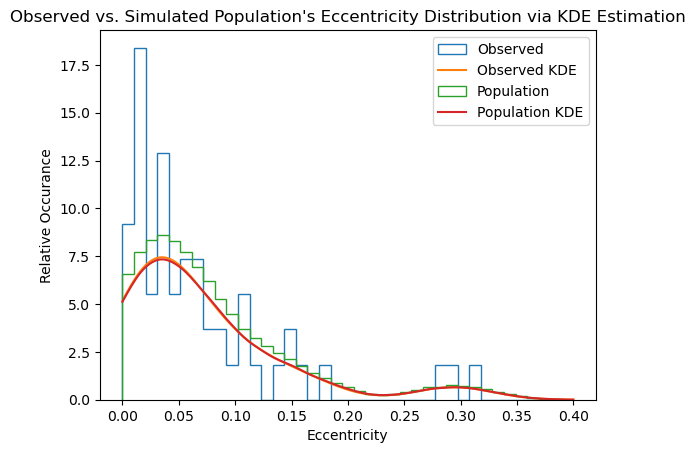

In [15]:
#eccentricities after spock
# Initialize the population eccentricites from observered eccentricities: e_list
# Load the data
eccentricity = df['Eccentricity'].to_numpy()

# Remove NaN and infinite values from the array
eccentricity = eccentricity[~np.isnan(eccentricity)]
eccentricity = eccentricity[eccentricity != 0]
eccentricity = eccentricity[np.isfinite(eccentricity)]

# Fit a KDE to the data
kde_e = gaussian_kde(eccentricity)

# Generate 10000 samples from the KDE
e_list = kde_e.resample(size=150000)[0] #change eccentricity to be half of kde see how much change

print(type(e_list))


# Create a histogram of the original data
n, bins_e, patches = plt.hist(eccentricity, bins=np.linspace(0, 0.4, 40), histtype='step', density=True, label = 'Observed')

# Plot the kernel density curve of the original data
x_grid_e = np.linspace(0, 0.4, 200)
plt.plot(x_grid_e, kde_e(x_grid_e), label='Observed KDE')

# Create a histogram of the new samples
n_new, bins_new, patches_new = plt.hist(e_list, bins=bins_e, histtype='step', density=True, label = 'Population')

# Plot the kernel density curve of the new samples
kde_new_e = gaussian_kde(e_list)
plt.plot(x_grid_e, kde_new_e(x_grid_e), label='Population KDE')
e_list = e_list[e_list > 0]

# Set plot title, labels, and legend
plt.title("Observed vs. Simulated Population's Eccentricity Distribution via KDE Estimation")
plt.xlabel("Eccentricity")
plt.ylabel("Relative Occurance")
plt.legend()

# Show the plot
plt.show()
np.save('e_list', e_list)

<class 'numpy.ndarray'>


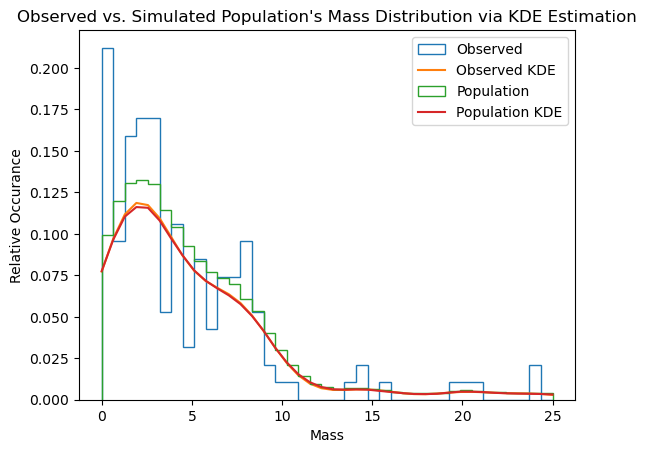

In [16]:
#masses after spock

# Initialize the population masses from observered masses: m_list
# Load the data
mass = df['Mass or Mass * sin(i) (M_earth)'].to_numpy()

# Remove NaN and infinite values from the array
mass = mass[~np.isnan(mass)]
mass = mass[mass != 0]
mass = mass[np.isfinite(mass)]
mass = mass[mass < 25]

# Fit a KDE to the data
kde = gaussian_kde(mass)

# Generate 10000 samples from the KDE
m_list = kde.resample(size=150000)[0]
print(type(m_list))


# Create a histogram of the original data
n, bins, patches = plt.hist(mass, bins=np.linspace(0, 25, 40), histtype='step', density=True, label = 'Observed')

# Plot the kernel density curve of the original data
x_grid = np.linspace(0, 25, 40)
plt.plot(x_grid, kde(x_grid), label='Observed KDE')

# Create a histogram of the new samples
n_new, bins_new, patches_new = plt.hist(m_list, bins=bins, histtype='step', density=True, label = 'Population')

# Plot the kernel density curve of the new samples
kde_new = gaussian_kde(m_list)
plt.plot(x_grid, kde_new(x_grid), label='Population KDE')
m_list = m_list[m_list > 0]

# Set plot title, labels, and legend
plt.title("Observed vs. Simulated Population's Mass Distribution via KDE Estimation")
plt.xlabel("Mass")
plt.ylabel("Relative Occurance")
plt.legend()


# Show the plot
plt.show()
np.save('m_list', m_list)

In [22]:
kde_changing = [.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5] # used for multiplying e and m list to test sensitivity
kde_changing = np.save('kde_changing', kde_changing)